 
# K-means clustering by Lizeth García A01632994

The notebook aims to study and implement a k-means clustering. The iris dataset will be used to identify clusters automatically.


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan


# Importing libraries

In [1]:
# Import the packages that we will be using
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [2]:
# url string that hosts our .csv file
url = "datasets/iris/iris.csv"

# Read the .csv file and store it as a pandas Data Frame
dataset = pd.read_csv(url)


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [3]:
print(dataset.shape)

dataset.head()


(150, 5)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


2. Drop rows with any missing values

In [4]:
dataset = dataset .dropna()

print(dataset.shape)

(150, 5)


3. Encoding the class label categorical column: from string to num


In [5]:
# Encoding the categorical column
dataset = dataset.replace({'Species':  {"Iris-setosa":1, "Iris-versicolor":2, "Iris-virginica":3} })

#Visualize the dataset
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


4. Discard columns that won't be used


In [6]:
# Drop out non necesary columns
dataset.drop(['SepalLengthCm', 'SepalWidthCm'],axis='columns',inplace=True)

dataset


,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,3
146,5.0,1.9,3
147,5.2,2.0,3
148,5.4,2.3,3


5. Scatter plot of the data

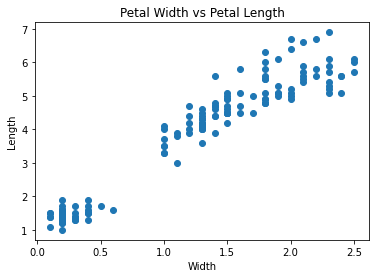

In [7]:
plt.scatter(dataset.PetalWidthCm,dataset.PetalLengthCm)
plt.title('Petal Width vs Petal Length')
plt.xlabel('Width')
plt.ylabel('Length')
plt.show()

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

<ipython-input-8-040330b9530b>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.PetalWidthCm, df1.PetalLengthCm, Label='Species Group 1')
<ipython-input-8-040330b9530b>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.PetalWidthCm, df2.PetalLengthCm, Label='Species Group 2')
<ipython-input-8-040330b9530b>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.PetalWidthCm, df3.PetalLengthCm, Label='Species Group 3')


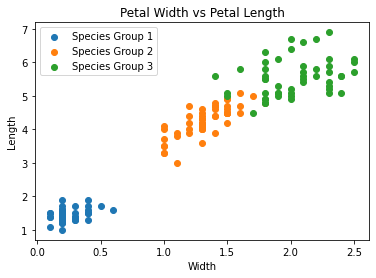

In [8]:
df1 = dataset[dataset.Species==1]
df2 = dataset[dataset.Species==2]
df3 = dataset[dataset.Species==3]

plt.scatter(df1.PetalWidthCm, df1.PetalLengthCm, Label='Species Group 1')
plt.scatter(df2.PetalWidthCm, df2.PetalLengthCm, Label='Species Group 2')
plt.scatter(df3.PetalWidthCm, df3.PetalLengthCm, Label='Species Group 3')

plt.title('Petal Width vs Petal Length')
plt.xlabel('Width')
plt.ylabel('Length')
plt.legend()
plt.show()

So, for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [9]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
km = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
#yp = km.fit_predict(dataset)
yp = km.fit_predict(dataset[['PetalWidthCm','PetalLengthCm']])

# Print estimated cluster of each point in the dataser
yp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
# Add a new column to the dataset with the cluster information
dataset['Cluster1'] = yp

dataset

,PetalLengthCm,PetalWidthCm,Species,Cluster1
0,1.4,0.2,1,1
1,1.4,0.2,1,1
2,1.3,0.2,1,1
3,1.5,0.2,1,1
4,1.4,0.2,1,1
...,...,...,...,...
145,5.2,2.3,3,2
146,5.0,1.9,3,2
147,5.2,2.0,3,2
148,5.4,2.3,3,2


In [11]:
dataset.Cluster1.unique()

array([1, 0, 2])

In [12]:
# ...
km.cluster_centers_

array([[1.34230769, 4.26923077],
       [0.246     , 1.462     ],
       [2.0375    , 5.59583333]])

In [13]:
# ...
km.inertia_

31.371358974358966

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

# Plot estimated clusters

Plot estimated clusters

<ipython-input-14-d6ea408ac591>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.PetalWidthCm, df1.PetalLengthCm, Label='Estimated Species Group 1')
<ipython-input-14-d6ea408ac591>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.PetalWidthCm, df2.PetalLengthCm, Label='Estimated Species Group 2')
<ipython-input-14-d6ea408ac591>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.PetalWidthCm, df3.PetalLengthCm, Label='Estimated Species Group 3')


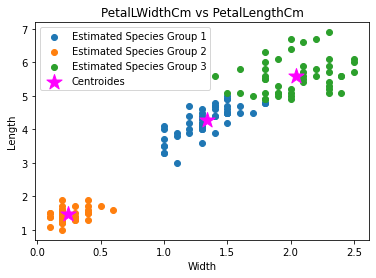

In [14]:
df1 = dataset[dataset.Cluster1==0]
df2 = dataset[dataset.Cluster1==1]
df3 = dataset[dataset.Cluster1==2]

plt.scatter(df1.PetalWidthCm, df1.PetalLengthCm, Label='Estimated Species Group 1')
plt.scatter(df2.PetalWidthCm, df2.PetalLengthCm, Label='Estimated Species Group 2')
plt.scatter(df3.PetalWidthCm, df3.PetalLengthCm, Label='Estimated Species Group 3')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('PetalLWidthCm vs PetalLengthCm')
plt.xlabel('Width')
plt.ylabel('Length')
plt.legend()
plt.show()

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [15]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(dataset[['PetalWidthCm','PetalLengthCm']])
    sse.append(km.inertia_)

C:\Users\lizgr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


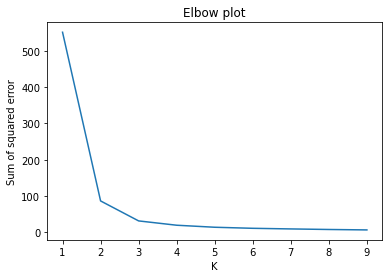

In [16]:
plt.plot(k_rng,sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

<span style='color:Blue'> **Important remarks**  </span>

According to the Elbot plot, the selected K agree with the real number of clusters



# Normalizing the data: preprocessing using min max scaler

Normalizing the data: preprocessing using min max scaler

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(dataset[['PetalWidthCm']])
dataset['PetalWidthCm'] = scaler.transform(dataset[['PetalWidthCm']])

scaler.fit(dataset[['PetalLengthCm']])
dataset['PetalLengthCm'] = scaler.transform(dataset[['PetalLengthCm']])

dataset

,PetalLengthCm,PetalWidthCm,Species,Cluster1
0,0.067797,0.041667,1,1
1,0.067797,0.041667,1,1
2,0.050847,0.041667,1,1
3,0.084746,0.041667,1,1
4,0.067797,0.041667,1,1
...,...,...,...,...
145,0.711864,0.916667,3,2
146,0.677966,0.750000,3,2
147,0.711864,0.791667,3,2
148,0.745763,0.916667,3,2


In [18]:
dataset.describe()

,PetalLengthCm,PetalWidthCm,Species,Cluster1
count,150.000000,150.000000,150.000000,150.000000
mean,0.467458,0.458056,2.000000,0.973333
std,0.299203,0.317599,0.819232,0.818795
min,0.000000,0.000000,1.000000,0.000000
25%,0.101695,0.083333,1.000000,0.000000
50%,0.567797,0.500000,2.000000,1.000000
75%,0.694915,0.708333,3.000000,2.000000
max,1.000000,1.000000,3.000000,2.000000


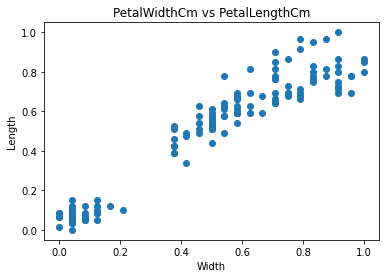

In [19]:
plt.scatter(dataset.PetalWidthCm,dataset.PetalLengthCm)
plt.title('PetalWidthCm vs PetalLengthCm')
plt.xlabel('Width')
plt.ylabel('Length')
plt.show()

In [20]:
# Initialize model and define number of clusters
km = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
#yp = km.fit_predict(dataset)
yp = km.fit_predict(dataset[['PetalWidthCm','PetalLengthCm']])

# Print estimated cluster of each point in the dataser
yp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
# Add a new column to the dataset with the cluster information
dataset['Cluster2'] = yp

dataset

,PetalLengthCm,PetalWidthCm,Species,Cluster1,Cluster2
0,0.067797,0.041667,1,1,1
1,0.067797,0.041667,1,1,1
2,0.050847,0.041667,1,1,1
3,0.084746,0.041667,1,1,1
4,0.067797,0.041667,1,1,1
...,...,...,...,...,...
145,0.711864,0.916667,3,2,0
146,0.677966,0.750000,3,2,0
147,0.711864,0.791667,3,2,0
148,0.745763,0.916667,3,2,0


<ipython-input-22-54c94892db7c>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.PetalWidthCm, df1.PetalLengthCm, Label='Estimated Species Group 1')
<ipython-input-22-54c94892db7c>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.PetalWidthCm, df2.PetalLengthCm, Label='Estimated Species Group 2')
<ipython-input-22-54c94892db7c>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.PetalWidthCm, df3.PetalLengthCm, Label='Estimated Species Group 3')


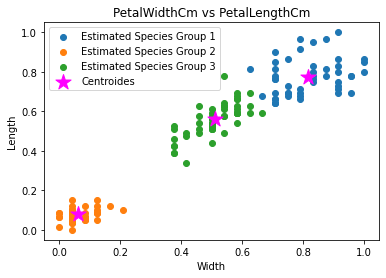

In [22]:
df1 = dataset[dataset.Cluster2==0]
df2 = dataset[dataset.Cluster2==1]
df3 = dataset[dataset.Cluster2==2]

plt.scatter(df1.PetalWidthCm, df1.PetalLengthCm, Label='Estimated Species Group 1')
plt.scatter(df2.PetalWidthCm, df2.PetalLengthCm, Label='Estimated Species Group 2')
plt.scatter(df3.PetalWidthCm, df3.PetalLengthCm, Label='Estimated Species Group 3')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('PetalWidthCm vs PetalLengthCm')
plt.xlabel('Width')
plt.ylabel('Length')
plt.legend()
plt.show()

# Final remarks

- K-Means clustering algorithm is perhaps the simplest and most popular unsupervised learning algorithm

- The number of clusters have to be defined by the user (i.e., by you ¡¡)

- The number assigned to each cluster is randomly assigned from set 0, 1, 2

- The order of the number in each cluster is random

- The **sklearn** package provides the tools for data processing suchs as k-means

# Activity: work with the iris dataset

1. Do clustering with the iris flower dataset to form clusters using as features petal width and length. Drop out the other two features (sepal width and length) for simplicity.

2. Do clustering with the iris flower dataset to form clusters using as features sepal width and length. Drop out the other two features (petal width and length) for simplicity.

3. Do clustering with the iris flower dataset to form clusters using as features sepal and petal width and length. Notice that scatter plots here are not possible


4. For the previous cases: 
    - With and without using min max scaling: determine whether the scaling benefits or not
    - Compute and show the elbow plot


5. Draw conclusiones:
    - About the scalling: does it help or not?
    - About the elbow plot: does the K agree with the real number of clusters?
    - Comparison between (i) sepal features alone, (ii) petal features alone, and (ii) both sepal with petal features: which one is better/worse? Why?
    
    

# Conclutions:
1. Viendo las gráficas iniciales se ven dos clusters (a simple vista) por la forma en que se dividen los datos, sin embargo de entrada sabemos que existen tres especies de iris, por lo tanto hace sentido iniciar con 3 clusters. 

Al hacer la elbow plot, se confirma que los datos dejan de variar de manera significativa a partir del punto 3, lo cual corrobora que la K adecuada es = 3.

En cuanto a la normalización, las gráficas y datos se ven bastante similares a los datos antes de realizar este proceso, por lo cual no parece tan necesario ni funcional en este caso específico. 
